<a href="https://colab.research.google.com/github/ismaelpereziimas/Procesamiento-de-Imagenes-Medicas/blob/main/Notebooks/2026_Procesamiento_de_Imagenes_Medicas_Operaciones_Intensidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Procesamiento de imágenes médicas**
----------

# Análisis de rayos X mamario mediante operaciones de intensidad básicas
-------

Por: Ing. Ismael Pérez Ruiz

iperez@modelo.edu.mx


La imagen usada fue tomada de:  Travieso-Aja, M. M., & Pérez-Luzardo, O. (2022). Utilidad clínica de la mamografía con contraste (CEM): una revisión de la literatura. Revista de Senología y Patología Mamaria, 35(4), 293–304.  10.1016/j.senol.2020.09.005

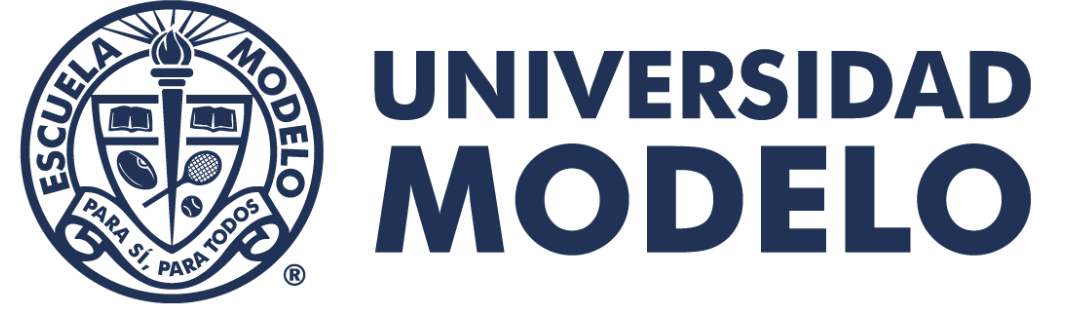

**Objetivo** Aplicar operaciones básicas de intensidad para mejorar la visualización y segmentación manual de imágenes de rayos-X mamario.

Link del archivo de imágen: https://drive.google.com/file/d/1RT2iOc54hwBLvjwrMrIlkXPwRu_Y3sgF/view?usp=drive_link

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [17]:
img=cv2.imread('img.png', cv2.IMREAD_GRAYSCALE)


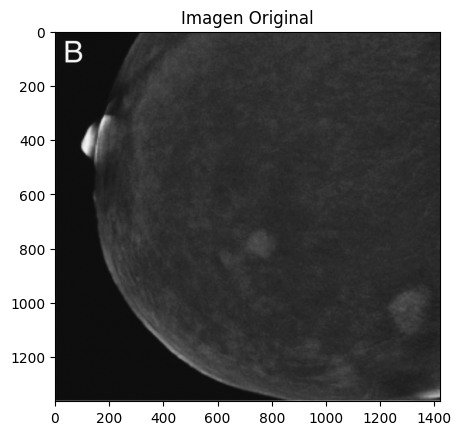

In [18]:
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.show()

# Cálculo del histograma

Por medio del método plt.hist se calcula el histograma de la imagen. Anteriormente se realizó de forma manual con dos ciclos for.

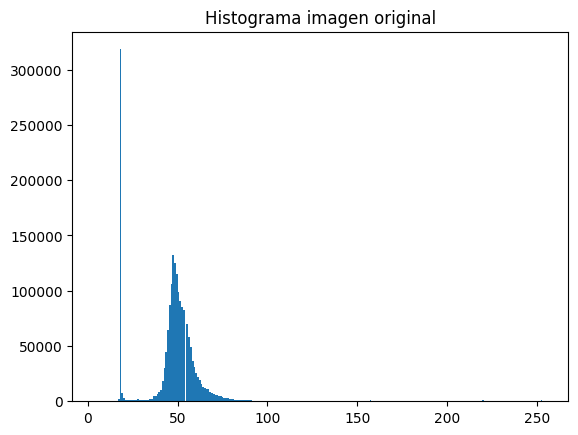

In [20]:
plt.hist(img.ravel(), bins=256)
plt.title("Histograma imagen original")
plt.show()

# Suma de la imagen (sin normalización)

En esta sección se realiza la suma de la imágen original con una constante, de forma que se tiene un efecto de desplazamiento en el histograma, dando como resultado una imagen más brillante

In [21]:
img_sum1=img.copy()

filas,columnas=img.shape

for x in range(filas):
    for y in range(columnas):
      nuevo_valor= img[x,y]+100

      img_sum1[x,y]=nuevo_valor


/tmp/ipython-input-3076333492.py:7: RuntimeWarning: overflow encountered in scalar add
  nuevo_valor= img[x,y]+100


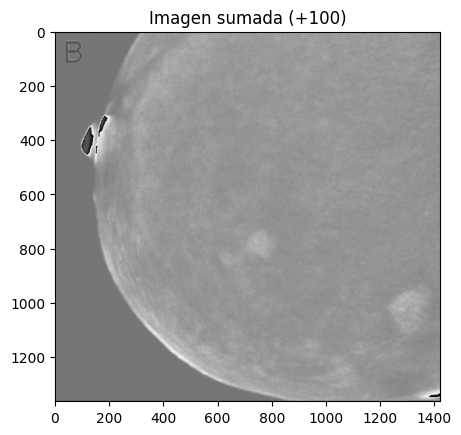

In [22]:
plt.imshow(img_sum1, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen sumada (+100)")
plt.show()

/tmp/ipython-input-3987599894.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_sum1.ravel(), 256, [0,256])


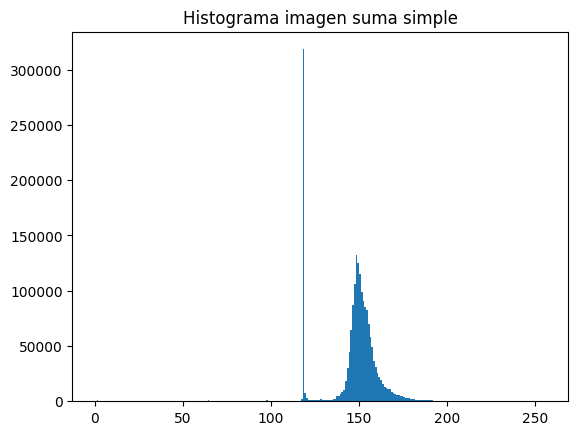

In [16]:
plt.hist(img_sum1.ravel(), 256, [0,256])
plt.title("Histograma imagen suma simple")
plt.show()

¿por qué la celda de abajo no puede ejecutarse?

In [25]:
img_sum2=img.copy()

filas,columnas=img.shape

for x in range(filas):
    for y in range(columnas):
      pixel=int(img[x,y])
      nuevo_valor= pixel+100

      img_sum1[x,y]=nuevo_valor

OverflowError: Python integer 349 out of bounds for uint8

In [26]:
img_sum3=img.copy()

filas,columnas=img.shape

for x in range(filas):
    for y in range(columnas):
      pixel=int(img[x,y])
      nuevo_valor= pixel+100

      if nuevo_valor>255:
        nuevo_valor=255

      img_sum3[x,y]=nuevo_valor

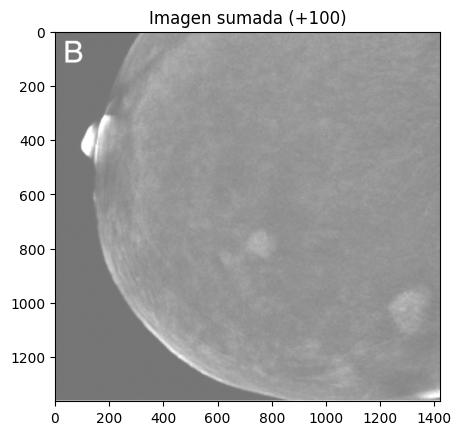

In [27]:
plt.imshow(img_sum3, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen sumada (+100)")
plt.show()

/tmp/ipython-input-417113333.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_sum3.ravel(), 256, [0,256])


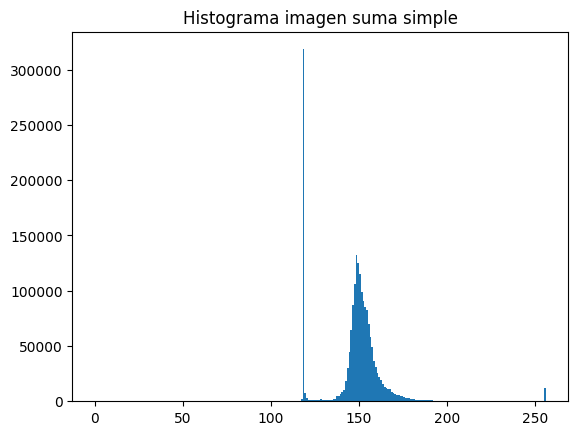

In [ ]:
plt.hist(img_sum3.ravel(), 256, [0,256])
plt.title("Histograma imagen suma simple")
plt.show()

# Suma con normalización (min-max)

In [28]:
img_norm=img.copy().astype(int)

In [29]:
filas,columnas=img.shape

for x in range(filas):
    for y in range(columnas):
      pixel=int(img[x,y])
      img_norm[x,y]=pixel+100

In [30]:
#Para encontrar el mínimo y el máximo
#se usará la estrategia de búsqueda por fuerza bruta

minimo=img_norm[0,0]
maximo=img_norm[0,0]

for x in range(filas):
    for y in range(columnas):
      if img_norm[x,y]<minimo:
        minimo=img_norm[x,y]
      if img_norm[x,y]>maximo:
        maximo=img_norm[x,y]







In [31]:
print("El minimo es: ",minimo)
print("El maximo es: ",maximo)

El minimo es:  104
El maximo es:  355


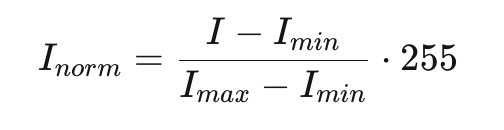

In [32]:
#Normalizacion convvencional.
img_final=img_norm.copy()

for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      img_final[x,y]=int((img_norm[x,y]-minimo)*255/(maximo-minimo))



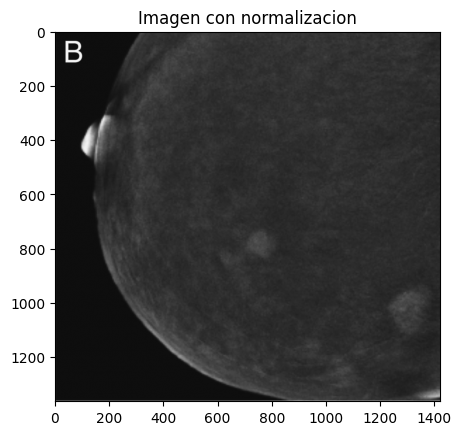

In [33]:
plt.imshow(img_final, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen con normalizacion")
plt.show()

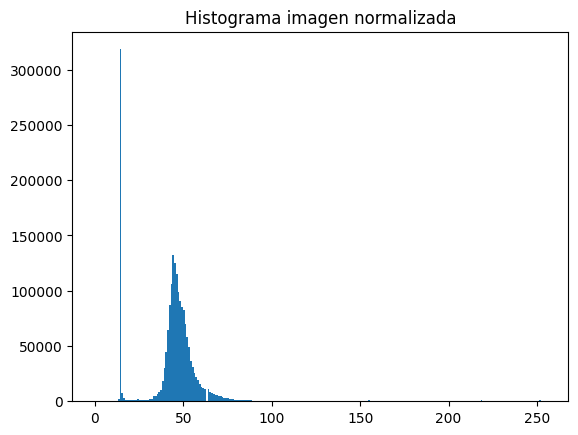

In [34]:
plt.hist(img_final.ravel(), bins=256)
plt.title("Histograma imagen normalizada")
plt.show()

# Multiplicación

In [35]:
img_mul=img.copy()

In [36]:
filas,columnas=img.shape

In [37]:
for x in range(filas):
    for y in range(columnas):
      pixel=int(img[x,y])
      nuevo=int(1.5*pixel)

      if nuevo>255:
        nuevo=255
      img_mul[x,y]=nuevo


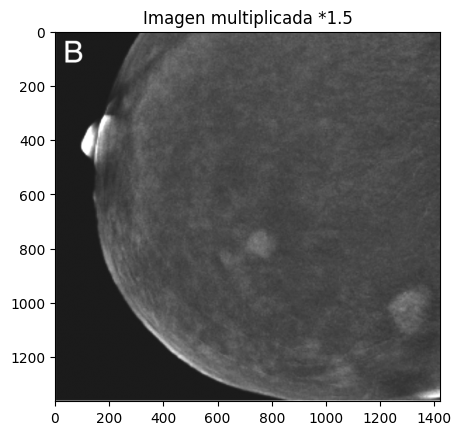

In [39]:
plt.imshow(img_mul, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen multiplicada *1.5")
plt.show()

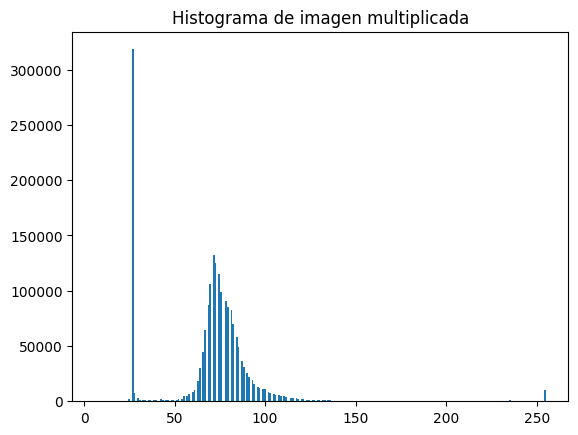

In [40]:
plt.hist(img_mul.ravel(), bins=256)
plt.title("Histograma de imagen multiplicada")
plt.show()

#Multiplicación y suma, agregando el factor media:

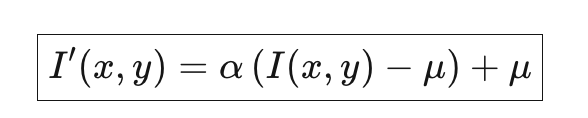

In [41]:
#Calculamos la media de la imagen
#aguas, media de intensidad
img_mul2=img.copy()

suma=0
filas,columnas=img.shape

for x in range(filas):
    for y in range(columnas):
      suma+=int(img[x,y])


media=suma/(filas*columnas)
print("La media de la imagen es: ",media)

La media de la imagen es:  47.62720096019402


In [42]:
alpha=5
for x in range(filas):
    for y in range(columnas):
      pixel=int(img[x,y])
      nuevo= alpha*(pixel-media)+media
      if nuevo<0:
        nuevo=0
      if nuevo>255:
        nuevo=255
      img_mul2[x,y]=int(nuevo)

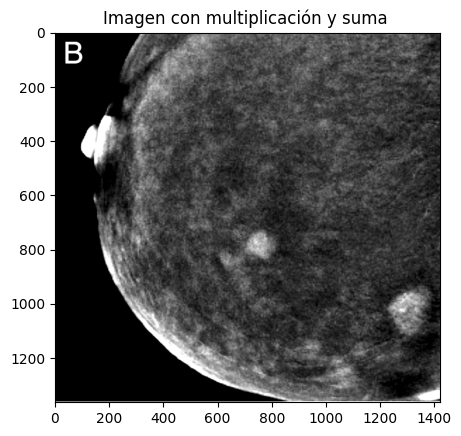

In [43]:
plt.imshow(img_mul2, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen con multiplicación y suma ")
plt.show()

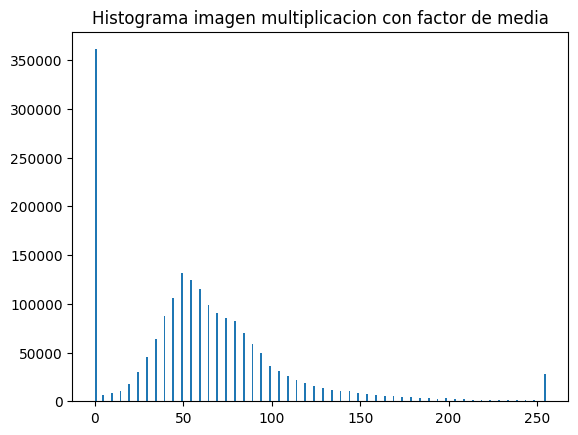

In [44]:
plt.hist(img_mul2.ravel(), bins=256)
plt.title("Histograma imagen multiplicacion con factor de media")
plt.show()

# Negativo de la imagen
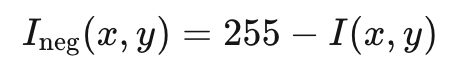

In [45]:
img_neg=img_mul2.copy()

filas,columnas=img_mul2.shape

for x in range(filas):
  for y in range(columnas):
    pixel=img_mul2[x,y]
    nuevo=255-pixel
    img_neg[x,y]=nuevo

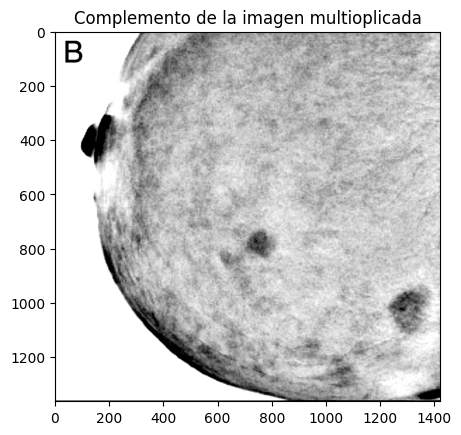

In [47]:
plt.imshow(img_neg, cmap='gray', vmin=0, vmax=255)
plt.title("Complemento de la imagen multioplicada")
plt.show()

# Segmentación de regiones por medio de multiplicación

In [48]:
#Creacion de la máscara
mask=np.zeros_like(img_neg)

In [49]:
y1_min, y1_max = 650, 900
x1_min, x1_max = 650, 850

mask[x1_min:x1_max, y1_min:y1_max] = 1

In [50]:
y2_min, y2_max = 1200, 1400
x2_min, x2_max = 900, 1150
mask[x2_min:x2_max, y2_min:y2_max] = 1

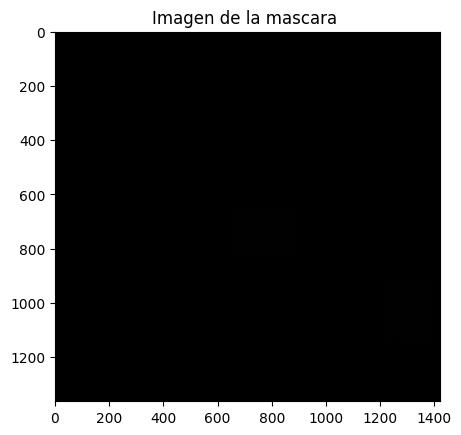

In [51]:
plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen de la mascara ")
plt.show()

In [52]:
img_seg=img_neg*mask

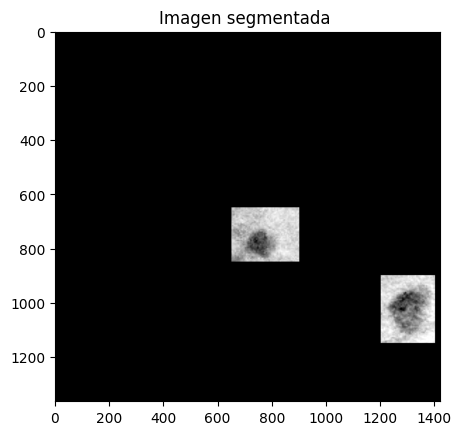

In [54]:
plt.imshow(img_seg, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen segmentada ")
plt.show()